# Software Development Tools: Project

**Project Description**

This project aims to provide you with additional practice on common software engineering tasks. These tasks will augment and complement your data skills, and make you a more attractive job candidate to potential employers. 
You will be asked to develop and deploy a web application to a cloud service so that it is accessible to the public.
In this project, we will provide you with the dataset on car sales advertisements, which you’ve already worked with in the past.

In [1]:
# Importing Libraries

import pandas as pd
import streamlit as st
import plotly.express as px
import altair as alt
import matplotlib.pyplot as plt
import math

In [2]:
# Reading in dataset

used_car_sales = pd.read_csv("vehicles_us.csv")

In [3]:
# Quick peek at the dataset

used_car_sales.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
# We'll first check for duplicates in this dataset

print(used_car_sales.duplicated().sum())

0


In [5]:
used_car_sales.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
print(used_car_sales['fuel'].unique())

['gas' 'diesel' 'other' 'hybrid' 'electric']


In [7]:
# creating a function to return the first word in used_car_sales['model'] 
# and return it to store the manufacturer

def extract_manufacturer(n):
    split_str = n.split()
    manufacturer = split_str[0]
    return manufacturer

In [8]:
used_car_sales['manufacturer'] = used_car_sales['model'].apply(extract_manufacturer)

In [9]:
used_car_sales.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,chrysler


In [10]:
print(used_car_sales['manufacturer'].unique())

['bmw' 'ford' 'hyundai' 'chrysler' 'toyota' 'honda' 'kia' 'chevrolet'
 'ram' 'gmc' 'jeep' 'nissan' 'subaru' 'dodge' 'mercedes-benz' 'acura'
 'cadillac' 'volkswagen' 'buick']


In [11]:
# Let's fill in the null values across model_year, cylinders, odometer and is_4wd

# adding 0 for non 4wd vehicles
used_car_sales['is_4wd'] = used_car_sales['is_4wd'].fillna(0)

used_car_sales.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler


In [12]:
# filling in model_year with median year for each model
median_year = used_car_sales.groupby('model')['model_year'].median()

median_year

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [13]:
# Fill in null values in 'model_year' based on the median year for each model
used_car_sales['model_year'] = used_car_sales.apply(
    lambda row: median_year[row['model']] if pd.isnull(row['model_year']) else row['model_year'], 
    axis=1
)

display(used_car_sales.head())
used_car_sales.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


In [14]:
# Filling in cylinders with median cylinders for each model
median_cylinders = used_car_sales.groupby('model')['cylinders'].median()

median_cylinders

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

In [15]:
used_car_sales['cylinders'] = used_car_sales.apply(
    lambda row: median_cylinders[row['model']] if pd.isnull(row['cylinders']) else row['cylinders'], 
    axis=1
)

display(used_car_sales.head())
used_car_sales.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  manufacturer  51525 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 5.5+ MB


In [16]:
# to fill nulls for odometer, we'll want to get the mean value for the model AND year, so we can have a more accurate value
# we'll create a new column of model_plus_year

used_car_sales['model_plus_year'] = used_car_sales['model_year'].astype(str) + used_car_sales['model']

used_car_sales.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,model_plus_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw,2011.0bmw x5
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford,2011.0ford f-150
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai,2013.0hyundai sonata
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,ford,2003.0ford f-150
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler,2017.0chrysler 200


In [17]:
mean_miles = used_car_sales.groupby('model_plus_year')['odometer'].mean()

mean_miles

model_plus_year
1908.0cadillac escalade              NaN
1908.0gmc yukon            169328.000000
1929.0ford f-150                     NaN
1936.0ford f-150            30000.000000
1948.0chevrolet impala       4000.000000
                               ...      
2019.0toyota highlander     12394.000000
2019.0toyota rav4           14148.000000
2019.0toyota sienna          5000.000000
2019.0toyota tacoma          4168.333333
2019.0volkswagen jetta       9735.000000
Name: odometer, Length: 2228, dtype: float64

In [18]:
used_car_sales['odometer'] = used_car_sales.apply(
    lambda row: mean_miles[row['model_plus_year']] if pd.isnull(row['odometer']) else row['odometer'], 
    axis=1
)

display(used_car_sales.head())
used_car_sales.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,model_plus_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,bmw,2011.0bmw x5
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford,2011.0ford f-150
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai,2013.0hyundai sonata
3,1500,2003.0,ford f-150,fair,8.0,gas,175165.5,automatic,pickup,NaN,0.0,2019-03-22,9,ford,2003.0ford f-150
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler,2017.0chrysler 200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            51525 non-null  int64  
 1   model_year       51525 non-null  float64
 2   model            51525 non-null  object 
 3   condition        51525 non-null  object 
 4   cylinders        51525 non-null  float64
 5   fuel             51525 non-null  object 
 6   odometer         51442 non-null  float64
 7   transmission     51525 non-null  object 
 8   type             51525 non-null  object 
 9   paint_color      42258 non-null  object 
 10  is_4wd           51525 non-null  float64
 11  date_posted      51525 non-null  object 
 12  days_listed      51525 non-null  int64  
 13  manufacturer     51525 non-null  object 
 14  model_plus_year  51525 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.9+ MB


We still have a couple null odometer readings, we may just need to fill with the mean odometer for the model, not the model+year

In [23]:
print(used_car_sales[used_car_sales['manufacturer'] == 'mercedes-benz'])

       price  model_year                              model  condition  \
42     34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
1642   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
2232   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
2731   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
4149   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
4681   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
5681   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
8975   34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
10600  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
11541  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
11916  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
14796  34900      2013.0  mercedes-benz benze sprinter 2500  excellent   
14871  34900      2013.0  mercedes-ben

All of the mercedes-benz vehicles are sprinter vans that don't have milage data. This prevents us from using the model's average milage to fill in blanks. If we removed these, we'd have no representation for mercedes-benz, so I think we'll leave this in here, just with the knowledge that we are missing some data. 

In [ ]:
# Adding a new column, age, to categorize how old each car is
used_car_sales['age'] = 2024 - used_car_sales['model_year']

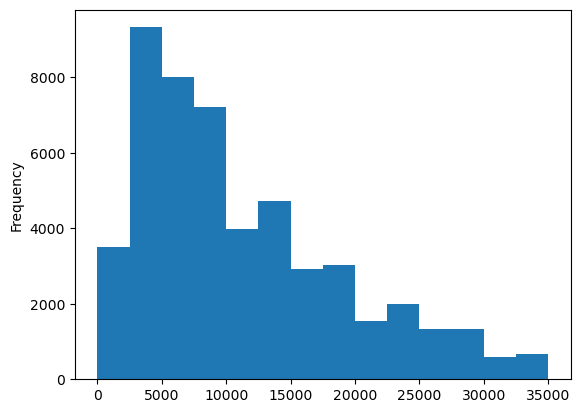

In [ ]:
# distribution of prices of all cars in the dataset
prices = used_car_sales['price']

prices.plot(kind='hist',
            bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27250, 30000, 32500, 35000])

plt.show()


Looks like most cars are falling in between the 5000 - 10000 range

In [ ]:
print(used_car_sales['price'].mean())
print(used_car_sales['price'].median())

12132.464919941776
9000.0


In [ ]:
color_discrete_map = {
    'SUV': 'rgb(255, 0, 0)',          # Red
    'pickup': 'rgb(0, 255, 0)',       # Green
    'sedan': 'rgb(0, 0, 255)',        # Blue
    'truck': 'rgb(255, 255, 0)',      # Yellow
    'coupe': 'rgb(255, 0, 255)',      # Magenta
    'van': 'rgb(0, 255, 255)',        # Cyan
    'convertible': 'rgb(255, 140, 0)',# Dark Orange
    'hatchback': 'rgb(128, 0, 128)',  # Purple
    'wagon': 'rgb(255, 192, 203)',    # Pink
    'mini-van': 'rgb(255, 69, 0)',    # Red-Orange
    'other': 'rgb(128, 128, 128)',    # Gray
    'offroad': 'rgb(0, 128, 0)',      # Green
    'bus': 'rgb(128, 0, 0)'           # Maroon
}

fig = px.histogram(used_car_sales, x='manufacturer', color='type', color_discrete_map=color_discrete_map)
fig.show()

I don't think that this chart is very useful anymore, but we'll leave it in just as part of the work-product.

In [ ]:
# Generating the unique car types for creating the color map above
print(used_car_sales['type'].unique())

['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


In [ ]:
avg_price_type = used_car_sales.groupby('type')['price'].mean()


fig2 = px.bar(avg_price_type)
fig2.show()

In [ ]:
avg_price_brand = used_car_sales.groupby('manufacturer')['price'].mean()

fig3 = px.bar(avg_price_brand)
fig3.show()

In [ ]:
print(used_car_sales['price'].max())

375000


In [ ]:
print(used_car_sales['model_year'].min())
print(used_car_sales['model_year'].max())

1908.0
2019.0


In [ ]:
used_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  age           47906 non-null  float64
 14  manufacturer  51525 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 5.9+ MB


In [ ]:
avg_selected = used_car_sales.groupby('type')['price'].mean()

avg_selected



type
SUV            11149.400000
bus            17135.666667
convertible    14575.881166
coupe          14353.442901
hatchback       6868.513849
mini-van        8193.177433
offroad        14292.294393
other          10989.714844
pickup         16057.410418
sedan           6965.358647
truck          16734.894924
van            10546.941548
wagon           9088.134328
Name: price, dtype: float64